In this lab we will use Python to work with a simple speech recognition system.
Unzip Lab11.rar file and you will find:

* Vowel recordings: in folder: /Lab11/DB/DBvocals/*.wav
* where part of these recordings will be used to train the vowel
speech recognition system. The other part is the one that we will
use to classify and evaluate the accuracy of the system based on
the correct percentage.
* Guide files:
* /Lab11/DBvocals_train_list_times.txt
* /Lab11/DBvocals_test_list_times.txt
* To know what recordings we will use as a training and as a test we
have these guide files.
* Each file contains the path of some * .wav files as well as 10 time
stamps: the start and end times of each of the 5 vowels.


* Install the environment using 
    pip install librosa

Exercises

A. Set up
Have a look at the following code to check how it works. You can execute the code and debug to see what the variables contain:

accuracy = lab11('DBvocals_train_list_times.txt', 'DBvocals_test_list_times.txt', 13)

In [1]:
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import librosa
from sklearn.neighbors import KNeighborsClassifier
import IPython.display as ipd

In [2]:
def process_data(dataset, nc, plot_data):
    data_mfcc = np.array([])
    data_labels = np.array([])
    for audio in range(len(dataset)):
        vowel_times = dataset[audio][1:];
        y, sr = librosa.load(dataset[audio][0],
                            sr=44100)
        # Use parameters : n_fft = 0.025 seconds, hop_length = 0.010
        mfcc_win = 0.025
        mfcc_hop = 0.010
        mfcc = librosa.feature.mfcc(y=y, 
                                    sr=sr,
                                    hop_length = 441,
                                    n_fft = 1103,
                                    n_mfcc=nc)

        labels = np.zeros(np.shape(mfcc))[1]
        tt_mfcc  = mfcc_win/2 + mfcc_hop*np.arange(np.shape(mfcc)[1]);
        for vowel_ind in np.arange(1,6):
            start_sample = np.argmin(abs(tt_mfcc-float(vowel_times[(vowel_ind-1)*2])))
            end_sample = np.argmin(abs(tt_mfcc-float(vowel_times[(vowel_ind-1)*2 + 1])))
            labels[start_sample:end_sample] = vowel_ind;
        
        data_mfcc  = np.concatenate((data_mfcc, mfcc), axis = 1) if data_mfcc.size else mfcc
        
        data_labels = np.append(data_labels, labels)
        if plot_data:
            tt = np.arange(len(y))/sr
            plt.plot(tt,y)
            plt.plot(tt_mfcc, max(abs(y))/max(labels)*labels, 'r');
            plt.show()
        
    return (data_mfcc, data_labels)
    


In [3]:
train_data = np.loadtxt('./DBvocals_train_list_times.txt', dtype = 'unicode')
test_data = np.loadtxt('./DBvocals_test_list_times.txt', dtype = 'unicode')

train


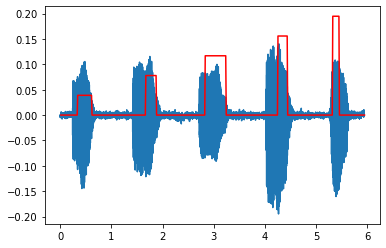

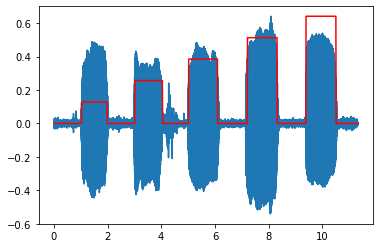

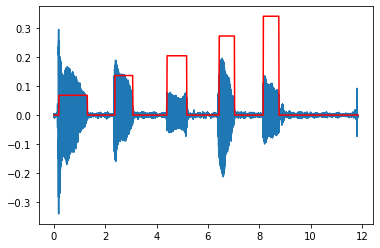

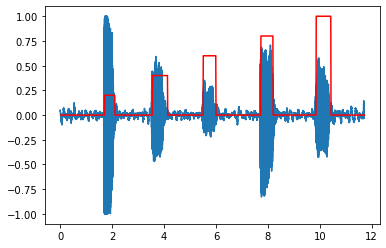

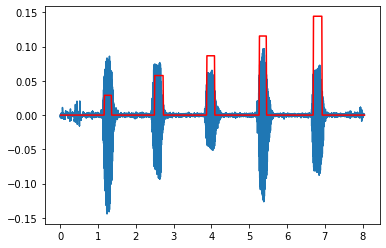

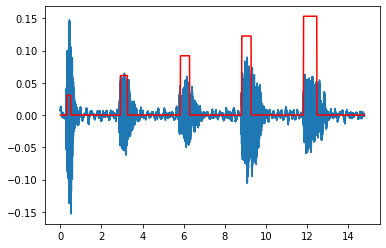

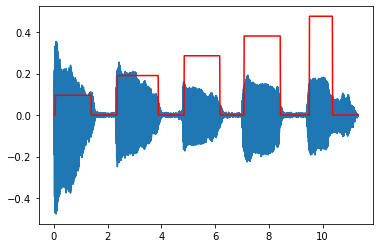

[0. 0. 0. ... 0. 0. 0.]
test


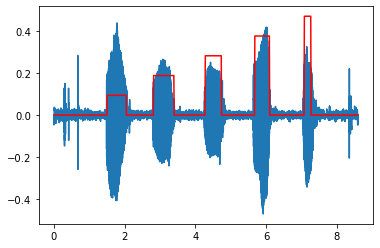

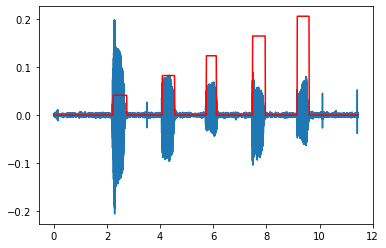

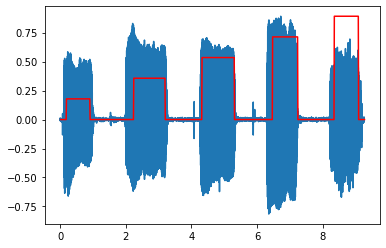

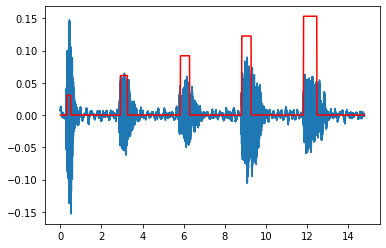

[0. 0. 0. ... 0. 0. 0.]


In [4]:
# Write code to run the above function with the train and test data. Test the function using
print('train')
train_data_mfcc, train_data_labels = process_data(train_data, 13, True)
print(train_data_labels)
print('test')
test_data_mfcc, test_data_labels = process_data(test_data, 13, True)
print(test_data_labels)
#print(train_acuracy = lab11('DBvocals_train_list_times.txt', 'DBvocals_test_list_times.txt', 13))

P1. Open the input txt file DBvocals_test_list_times.txt and make sure you
understand their content. To which vowel do times 4.28 and 4.74
correspond to?

In [5]:
train_list = np.loadtxt('./DBvocals_train_list_times.txt', dtype = 'unicode')
print(train_list)
print('')


"The file contains: filepath to a .wav (vocal) and timestamps of the vowels, non silence frames."
"Times 4.28 to 4.74 correspond to different vowels depending of the file"

[['./DB/DBvocals/Vocals_M_146654.wav' '0.34' '0.62' '1.67' '1.88' '2.83'
  '3.24' '4.25' '4.44' '5.32' '5.45']
 ['./DB/DBvocals/vocals_F_147871_152746.wav' '1.04' '1.99' '3.02' '4.05'
  '5.02' '6.10' '7.21' '8.32' '9.39' '10.51']
 ['./DB/DBvocals/vocals_F_152764_152796.wav' '0.20' '1.31' '2.38' '3.08'
  '4.41' '5.18' '6.44' '7.04' '8.16' '8.77']
 ['./DB/DBvocals/vocals_F_152795.wav' '1.71' '2.11' '3.55' '4.14' '5.51'
  '6.00' '7.73' '8.20' '9.86' '10.43']
 ['./DB/DBvocals/vocals_M_152769.wav' '1.17' '1.36' '2.50' '2.73' '3.88'
  '4.09' '5.27' '5.46' '6.70' '6.93']
 ['./DB/DBvocals/vocals_M_159904.wav' '0.33' '0.52' '2.93' '3.27' '5.84'
  '6.29' '8.82' '9.28' '11.82' '12.47']
 ['./DB/DBvocals/vocals_f_146646_146641.wav' '0.06' '1.39' '2.36' '3.89'
  '4.85' '6.18' '7.08' '8.43' '9.51' '10.37']]



'Times 4.28 to 4.74 correspond to different vowels depending of the file'

P2. By debugging the code, plot the data in the
train_labels variable. What does it correspond to?

7
(7499,) 7499


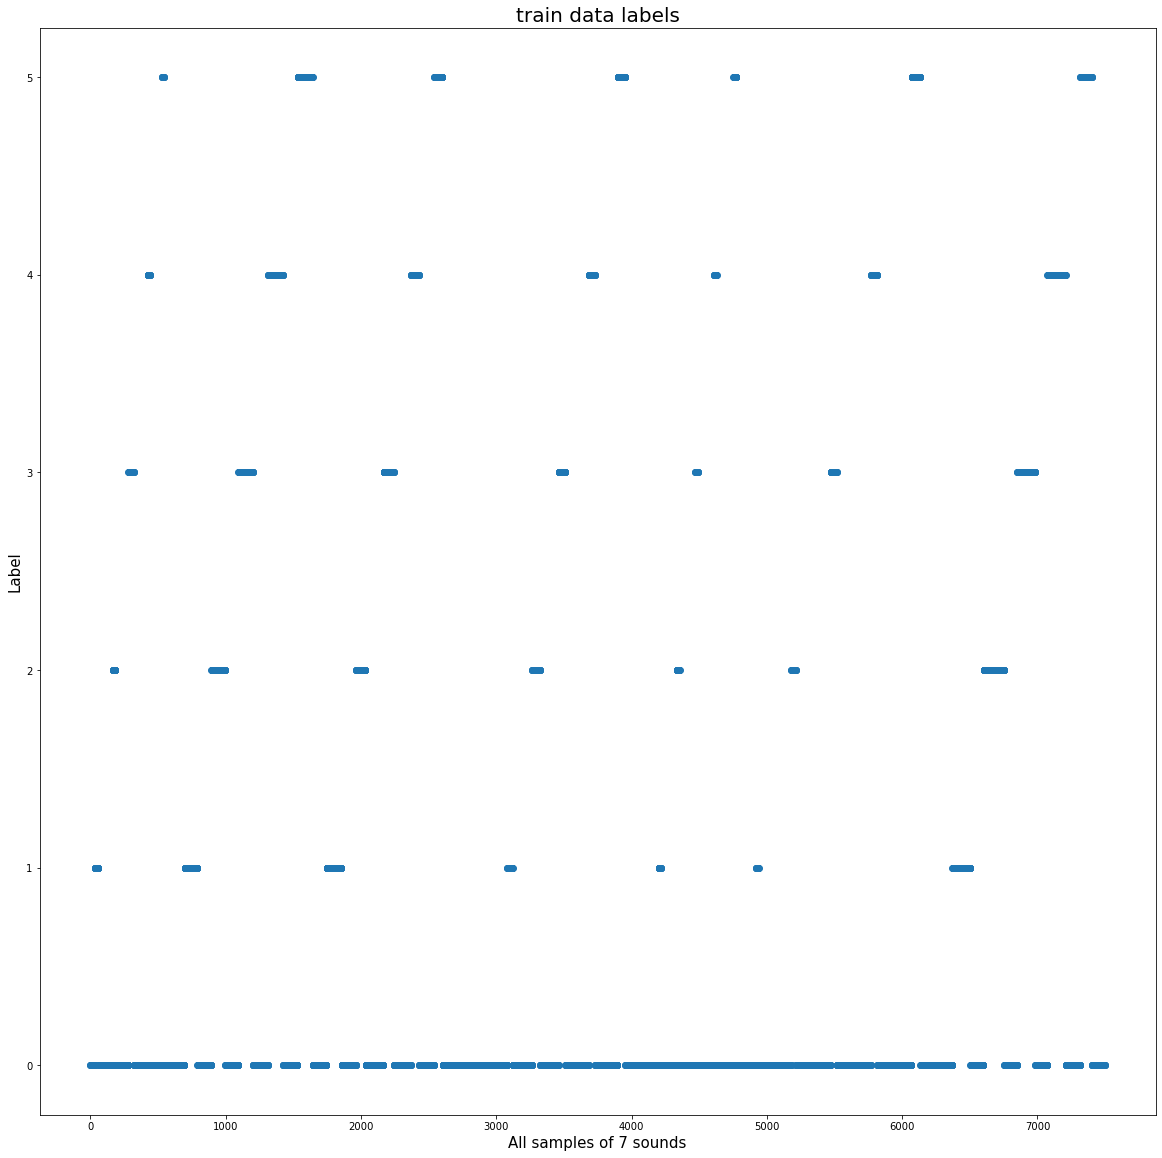

labels go through 1-5, a number for each vocal and 0 for silence

plt.plot(tt_mfcc, max(abs(y))/max(labels)*labels, ) this expression normalizes the label to de max absolute value of the signal to plot it nicely


'In the graph we can see that the function classifies sound by sound and all vowels are in order.'

In [6]:
print(len(train_data))
train_data_mfcc, train_data_labels = process_data(train_data, 13, False)
#print(train_data_labels)
print(train_data_labels.shape,len(train_data_labels))
plt.figure(figsize=(20,20)) 
plt.plot(train_data_labels, 'o')
plt.title("train data labels", fontsize=20)
plt.xlabel("All samples of 7 sounds",fontsize=15),plt.ylabel("Label",fontsize=15)
#plt.xlim(0,10)
plt.show()

print('labels go through 1-5, a number for each vocal and 0 for silence')
print('')
print('plt.plot(tt_mfcc, max(abs(y))/max(labels)*labels, 'r') this expression normalizes the label to de max absolute value of the signal to plot it nicely')
"In the graph we can see that the function classifies sound by sound and all vowels are in order."


P3. By debugging the code with breakpoints, check the dimensions of
train_mfcc.

Dimensions of train_mfcc: (13, 7499)


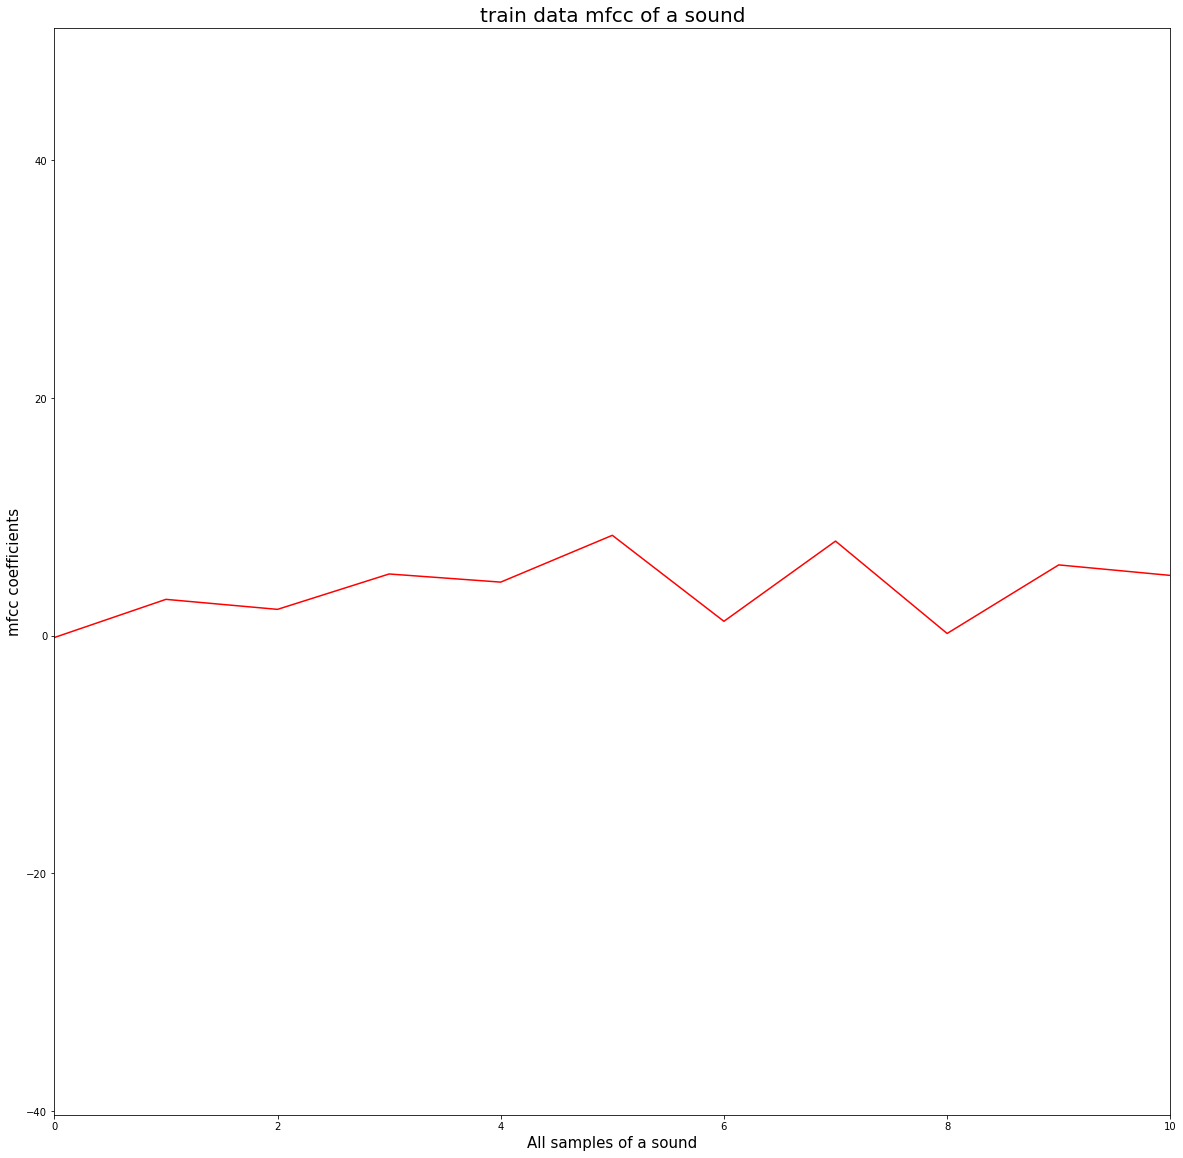

[-6.5947510e+02  9.3089203e+01  4.9471748e+01  3.4897270e+01
  3.6562172e+01  2.0212002e+01  7.4609799e+00 -4.5741823e-01
  4.8027086e+00  1.2734369e+01  1.2745799e+01  7.2752304e+00
  3.0587149e+00]


In [7]:
train_data_mfcc, train_data_labels = process_data(train_data, 13, False)
print('Dimensions of train_mfcc:',train_data_mfcc.shape)

plt.figure(figsize=(20,20)) 
plt.plot(train_data_mfcc[12][:], 'r-')
plt.title("train data mfcc of a sound", fontsize=20)
plt.xlabel("All samples of a sound",fontsize=15),plt.ylabel("mfcc coefficients",fontsize=15)
plt.xlim(0,10)
plt.show()

print(train_data_mfcc[:,1])

B. Classification with “nearest neighbours”

A simple method for classification is called nearest neighbors. Starting from 2
data set, one of them will serve as a reference (training set) to be able to classify
the other one (test set). The method assigns to the unknown data the closest
class of the training group based on a measure of distance between vectors.
For each data point in the test set to be classified (example: vector "a" of N = 13
MFCC coefficients), we will calculate the Euclidean distance to each element "b"
of the training set. Remember not to compute the distance to silence vectors,
only to vowel MFCC vectors. Thus, in our case of vectors of 13 components, the
distance between 2 vectors "a" and "b" would be:
\begin{equation}
d = \sqrt{(a_{1}-b_{1})^2 + (a_{2}-b_{2})^2 + ... + (a_{N}-b_{N})^2}  with N = 13
\end{equation}

The criterion of "nearest neighbors" to assign a class is that the observation to
classify will be assigned the same class of the closest (minimum distance d)
element from the training set. In general, we will use the data of train recordings
for the training and the test set to classify.

class_labels = nearest_neighbours(train_labels, train_mfcc, test_labels, test_mfcc);

P4. Implement the nearest_neighbours function. How many ‘for’ loops does
your implementation need in order to process all the data?

* In this case, just try to understand the algorithm how it works and how many for loops you would need to implement it. For this exercise, you can use KNeighborsClassifier from sklean library with K=5. To use it:
* knn = KNeighborsClassifier(n_neighbors = (), metric='euclidean')
* knn.fit((training data), (training labels)
* (prediction labels)= knn.predict((test data))

* Note: You might have to use numpy.transpose with training data and test data to match the dimensions with the corresponging labels

In [9]:
#2 fors 1 per la cada punt q vols classificar i un altre per cada punt a calcular la distancia
def nearest_neighbours(train_labels, train_mfcc, test_labels, test_mfcc):
    
    #train
    knn = KNeighborsClassifier(n_neighbors = 5, metric='euclidean')
    knn.fit(train_mfcc,train_labels)
    
    
    #test      
    prediction_labels = knn.predict(test_mfcc)
    
    return prediction_labels
    
    
#Get the data (train and test)
tain_mfcc, train_labels = process_data(train_data, 13, False)
test_mfcc, test_labels = process_data(test_data, 13, False)

#Check dimensions
print(train_labels.shape,train_mfcc.shape,test_labels.shape,test_mfcc.shape)
print(np.transpose(train_mfcc).shape)

#Run the algorithm
class_labels = nearest_neighbours(train_labels, np.transpose(train_mfcc), test_labels, np.transpose(test_mfcc));
print(class_labels.shape)


(7499,) (13, 7499) (4410,) (13, 4410)
(7499, 13)
(4410,)


P5. Which set should you first iterate to build the nearest neighbours
classifier?

To evaluate the classification accuracy, we calculate the percentage of well-
qualified frames. That is, only for those frames that correspond to a vowel, we
compare the reference (test_labels) to our classification (class_labels).
Implement the code to compute the precision (accuracy) of the test frames
classification (only taking into account those labeled as a vowel, not the silence).
accuracy = ... (it is a percentage)

For this part, use numpy.where function to filter labels that are set to 0. The vowel labels are represented using 1 to 5. Once you have the filtered labels, use the resulting indexes to get the corresponding data points. Remember to filter the testing data labels also for predicting

In [31]:



#Remove 0 labels to calculate accuracy

count = 0
testing_labels = np.zeros([])
predict_labels = np.zeros([])
for i in range(len(test_labels)):
    if test_labels[i] != 0:
        count = count + 1
        testing_labels = np.append(testing_labels,test_labels[i])
        predict_labels = np.append(predict_labels,class_labels[i])
        
print(len(test_labels))
print(count)
print(testing_labels.shape,predict_labels.shape)

#Calculate accuracy
correct = 0
for i in range(len(testing_labels)):
    if testing_labels[i] == predict_labels[i]: correct = correct +1
        
accuracy = correct/len(testing_labels)

#accuracy = accuracy_score(testing_labels,predict_labels)
print('Accuracy:',accuracy)



4410
1076
(1077,) (1077,)
Accuracy: 0.004642525533890436


C. Classification with different configurations

Run the code with the training file that accompanies the lab. As a test, use this
same training file. Use nc = 13.

P6. Which accuracy do you get when classifying the train set (percentage)?
Run the code with the training and test files that accompany the lab. Use nc = 13
MFCCs.

P7. Which accuracy do get when classifying the test set?

P8. Which accuracy do you get when classifying the test set with 3
coefficients?

P9. Which accuracy do you get when classifying the test set using only the
first 2 training files as reference and 13 coeffients?

In [35]:
    

#Get the data (train and test)
tain_mfcc, train_labels = process_data(train_data, 13, False)
test_mfcc, test_labels = process_data(test_data, 13, False)

#
####---------------------- P6 test data = training data --------------------
#

#Run the algorithm
class_labels = nearest_neighbours(train_labels, np.transpose(train_mfcc), train_labels,np.transpose(train_mfcc))#test_labels, np.transpose(test_mfcc));


#Remove 0 labels to calculate accuracy
count = 0
training_labels = np.zeros([])
predict_labels = np.zeros([])
for i in range(len(train_labels)):
    if train_labels[i] != 0:
        count = count + 1
        training_labels = np.append(training_labels,train_labels[i])
        predict_labels = np.append(predict_labels,class_labels[i])
        
#Calculate accuracy
correct = 0
for i in range(len(training_labels)):
    if training_labels[i] == predict_labels[i]: correct = correct +1
        
accuracy = correct/len(training_labels)

#accuracy = accuracy_score(testing_labels,predict_labels)
print('P6: Accuracy:',accuracy)
print('')
#
####---------------------- P7 test data = test data --------------------
#

#Run the algorithm
class_labels = nearest_neighbours(train_labels, np.transpose(train_mfcc), test_labels,np.transpose(test_mfcc))


#Remove 0 labels to calculate accuracy
count = 0
testing_labels = np.zeros([])
predict_labels = np.zeros([])
for i in range(len(test_labels)):
    if test_labels[i] != 0:
        count = count + 1
        testing_labels = np.append(testing_labels,test_labels[i])
        predict_labels = np.append(predict_labels,class_labels[i])
        
#Calculate accuracy
correct = 0
for i in range(len(testing_labels)):
    if testing_labels[i] == predict_labels[i]: correct = correct +1
        
accuracy = correct/len(testing_labels)

#accuracy = accuracy_score(testing_labels,predict_labels)
print('P7: Accuracy:',accuracy)
print('')


P6: Accuracy: 0.9906124273580689

P7: Accuracy: 0.861652739090065



In [33]:
#
####---------------------- P8 nc = 3 for data --------------------
#

#Get the data (train and test)
train_mfcc, train_labels = process_data(train_data, 3, False)
test_mfcc, test_labels = process_data(test_data, 3, False)

#Run the algorithm
class_labels = nearest_neighbours(train_labels, np.transpose(train_mfcc), test_labels,np.transpose(test_mfcc))


#Remove 0 labels to calculate accuracy
count = 0
testing_labels = np.zeros([])
predict_labels = np.zeros([])
for i in range(len(test_labels)):
    if test_labels[i] != 0:
        count = count + 1
        testing_labels = np.append(testing_labels,test_labels[i])
        predict_labels = np.append(predict_labels,class_labels[i])
        
#Calculate accuracy
correct = 0
for i in range(len(testing_labels)):
    if testing_labels[i] == predict_labels[i]: correct = correct +1
        
accuracy = correct/len(testing_labels)

#accuracy = accuracy_score(testing_labels,predict_labels)
print('P8: Accuracy:',accuracy)


P8: Accuracy: 0.43175487465181056


In [39]:

#---------------- P9. Which accuracy do you get when classifying the test set using only the first 2 training files as reference and 13 coeffients?

#Get the data (train and test)
train_mfcc, train_labels = process_data(train_data, 13, False)
test_mfcc, test_labels = process_data(test_data, 13, False)

#Run the algorithm
class_labels = nearest_neighbours(train_labels, np.transpose(train_mfcc), test_labels,np.transpose(test_mfcc))


#Remove 0 labels to calculate accuracy
count = 0
testing_labels = np.zeros([])
predict_labels = np.zeros([])
for i in range(len(test_labels)):
    if test_labels[i] != 0:
        count = count + 1
        testing_labels = np.append(testing_labels,test_labels[i])
        predict_labels = np.append(predict_labels,class_labels[i])
        
#Calculate accuracy
correct = 0
for i in range(len(testing_labels)):
    if testing_labels[i] == predict_labels[i]: correct = correct +1
        
accuracy = correct/len(testing_labels)

#accuracy = accuracy_score(testing_labels,predict_labels)
print('P9: Accuracy:',accuracy)


P9: Accuracy: 0.861652739090065
